# Course Recommendation using K-Means

### Clustering defined

Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a metric that reflects the strength of relationship between two data objects. 

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
coursesData = pd.read_csv(r"C:\Users\Attadeep\PycharmProjects\Project\final_courses.csv")
coursesData

,url,is_paid,course_by,title,skills,ratings,reviews,"level, type and duration"
0,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Introduction to Statistics,"Data Science, General Statistics, Probability ...",4.6,(2k reviews),Beginner · Course · 1-3 Months
1,https://www.coursera.org/learn/dyslexia,False,Yale University,Overcoming Dyslexia,"Web Design, Web Development, Algebra, Mathematics",4.7,(104 reviews),Beginner · Course · 1-3 Months
2,https://www.coursera.org/learn/medical-neurosc...,False,Duke University,Medical Neuroscience,"Cyberattacks, Security Engineering, Computer N...",4.9,(2.6k reviews),Advanced · Course · 3-6 Months
3,https://www.coursera.org/learn/forensic-accoun...,False,West Virginia University,Forensic Accounting and Fraud Examination,"Cryptography, Theoretical Computer Science, Se...",4.7,(5k reviews),Mixed · Course · 1-3 Months
4,https://www.coursera.org/learn/crypto,False,Stanford University,Cryptography I,"Data Management, Leadership and Management, Cl...",4.8,(4.1k reviews),Mixed · Course · 1-3 Months
...,...,...,...,...,...,...,...,...
377,https://www.udacity.com//course/machine-learni...,False,Udacity,Career Advancement,machine learning,NaN,NaN,NaN
378,https://www.udacity.com//course/front-end-inte...,False,Udacity,Career Advancement,front-end,NaN,NaN,NaN
379,https://www.udacity.com//course/full-stack-int...,False,Udacity,Career Advancement,full-stack,NaN,NaN,NaN
380,https://www.udacity.com//course/data-structure...,False,Udacity,Career Advancement,"data structures,algorithms",NaN,NaN,NaN


In [3]:
coursesData.describe(include='all')

,url,is_paid,course_by,title,skills,ratings,reviews,"level, type and duration"
count,382,382,382,382,382,283.000000,283,283
unique,382,1,109,289,333,NaN,192,15
top,https://www.coursera.org/learn/stanford-statis...,False,Udacity,School of Programming & Development,"android,kotlin",NaN,(1.1k reviews),Beginner · Course · 1-3 Months
freq,1,382,99,65,9,NaN,17,84
mean,NaN,NaN,NaN,NaN,NaN,4.705300,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.153471,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,4.100000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.600000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,4.700000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,4.800000,NaN,NaN


In [4]:
coursesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       382 non-null    object 
 1   is_paid                   382 non-null    bool   
 2   course_by                 382 non-null    object 
 3   title                     382 non-null    object 
 4   skills                    382 non-null    object 
 5   ratings                   283 non-null    float64
 6   reviews                   283 non-null    object 
 7   level, type and duration  283 non-null    object 
dtypes: bool(1), float64(1), object(6)
memory usage: 21.4+ KB


In [5]:
# Removing unwanted columns
coursesData = coursesData[['title', 'url', 'is_paid', 'course_by', 'skills']]
coursesData

,title,url,is_paid,course_by,skills
0,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,"Data Science, General Statistics, Probability ..."
1,Overcoming Dyslexia,https://www.coursera.org/learn/dyslexia,False,Yale University,"Web Design, Web Development, Algebra, Mathematics"
2,Medical Neuroscience,https://www.coursera.org/learn/medical-neurosc...,False,Duke University,"Cyberattacks, Security Engineering, Computer N..."
3,Forensic Accounting and Fraud Examination,https://www.coursera.org/learn/forensic-accoun...,False,West Virginia University,"Cryptography, Theoretical Computer Science, Se..."
4,Cryptography I,https://www.coursera.org/learn/crypto,False,Stanford University,"Data Management, Leadership and Management, Cl..."
...,...,...,...,...,...
377,Career Advancement,https://www.udacity.com//course/machine-learni...,False,Udacity,machine learning
378,Career Advancement,https://www.udacity.com//course/front-end-inte...,False,Udacity,front-end
379,Career Advancement,https://www.udacity.com//course/full-stack-int...,False,Udacity,full-stack
380,Career Advancement,https://www.udacity.com//course/data-structure...,False,Udacity,"data structures,algorithms"


In [6]:
# check for duplicates
coursesData.duplicated().sum()

0

In [7]:
# check for missing values
coursesData.isnull().sum()

title        0
url          0
is_paid      0
course_by    0
skills       0
dtype: int64

In [8]:
# Converting skills column to list type
coursesData['skills'] = coursesData['skills'].str.split(',')
coursesData

,title,url,is_paid,course_by,skills
0,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,"[Data Science, General Statistics, Probabili..."
1,Overcoming Dyslexia,https://www.coursera.org/learn/dyslexia,False,Yale University,"[Web Design, Web Development, Algebra, Math..."
2,Medical Neuroscience,https://www.coursera.org/learn/medical-neurosc...,False,Duke University,"[Cyberattacks, Security Engineering, Compute..."
3,Forensic Accounting and Fraud Examination,https://www.coursera.org/learn/forensic-accoun...,False,West Virginia University,"[Cryptography, Theoretical Computer Science, ..."
4,Cryptography I,https://www.coursera.org/learn/crypto,False,Stanford University,"[Data Management, Leadership and Management, ..."
...,...,...,...,...,...
377,Career Advancement,https://www.udacity.com//course/machine-learni...,False,Udacity,[machine learning]
378,Career Advancement,https://www.udacity.com//course/front-end-inte...,False,Udacity,[front-end]
379,Career Advancement,https://www.udacity.com//course/full-stack-int...,False,Udacity,[full-stack]
380,Career Advancement,https://www.udacity.com//course/data-structure...,False,Udacity,"[data structures, algorithms]"


In [9]:
coursesData = coursesData.explode('skills', ignore_index=True)
coursesData

,title,url,is_paid,course_by,skills
0,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Data Science
1,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,General Statistics
2,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Probability & Statistics
3,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Statistical Tests
4,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Estimation
...,...,...,...,...,...
2600,Career Advancement,https://www.udacity.com//course/front-end-inte...,False,Udacity,front-end
2601,Career Advancement,https://www.udacity.com//course/full-stack-int...,False,Udacity,full-stack
2602,Career Advancement,https://www.udacity.com//course/data-structure...,False,Udacity,data structures
2603,Career Advancement,https://www.udacity.com//course/data-structure...,False,Udacity,algorithms


In [10]:
coursesData['skills'].value_counts()

skills
 Leadership and Management    112
 Strategy and Operations       92
 Research and Design           88
 Entrepreneurship              83
 Probability & Statistics      55
                             ... 
 Customer Analysis              1
Big Data                        1
 Data Model                     1
Risk Management                 1
data structures                 1
Name: count, Length: 388, dtype: int64

In [11]:
coursesDataEncoded = coursesData.copy()

### Label Encoding for Non numeric column 

In [12]:
features = ['title','url','is_paid','course_by','skills']
label_encoder = LabelEncoder()

for col in features:
    coursesDataEncoded[col] = label_encoder.fit_transform(coursesDataEncoded[col])
    # print(label_encoder.inverse_transform(coursesData[col])

coursesData

,title,url,is_paid,course_by,skills
0,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Data Science
1,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,General Statistics
2,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Probability & Statistics
3,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Statistical Tests
4,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Estimation
...,...,...,...,...,...
2600,Career Advancement,https://www.udacity.com//course/front-end-inte...,False,Udacity,front-end
2601,Career Advancement,https://www.udacity.com//course/full-stack-int...,False,Udacity,full-stack
2602,Career Advancement,https://www.udacity.com//course/data-structure...,False,Udacity,data structures
2603,Career Advancement,https://www.udacity.com//course/data-structure...,False,Udacity,algorithms


Text(0, 0.5, 'Inertias')

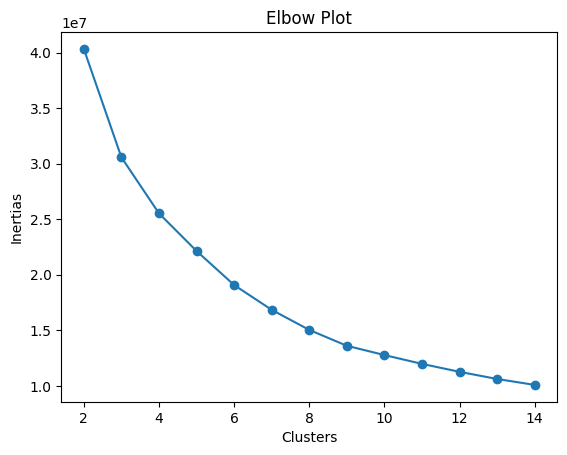

In [13]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, init='k-means++',random_state=0).fit(coursesDataEncoded)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')
plt.title("Elbow Plot")
plt.xlabel("Clusters")
plt.ylabel("Inertias")

In [14]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0).fit(coursesDataEncoded)
kmeans

KMeans(n_clusters=6, random_state=0)

In [15]:
identifiedCluster = kmeans.fit_predict(coursesDataEncoded)
identifiedCluster = list(identifiedCluster)
identifiedCluster


[1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 4,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 4,
 4,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 5,
 4,
 4,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 2,
 2,
 2,
 1,
 1,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 5,
 4,
 5,
 5,
 5,
 4,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 4,


In [16]:
import joblib
  
# Save the xgb_clf_tfidf model as a pickle in a file
joblib.dump(kmeans, r'C:\Users\Attadeep\PycharmProjects\Project\kmeansClustering.pkl')

['C:\\Users\\Attadeep\\PycharmProjects\\Project\\kmeansClustering.pkl']

In [17]:
coursesDataEncoded["cluster_predicted"] = identifiedCluster
coursesDataEncoded

,title,url,is_paid,course_by,skills,cluster_predicted
0,160,237,0,49,279,1
1,160,237,0,49,109,2
2,160,237,0,49,171,1
3,160,237,0,49,216,1
4,160,237,0,49,95,2
...,...,...,...,...,...,...
2600,37,317,0,66,351,3
2601,37,319,0,66,353,3
2602,37,305,0,66,342,3
2603,37,305,0,66,327,3


In [18]:
coursesData["cluster_predicted"] = identifiedCluster
coursesData

,title,url,is_paid,course_by,skills,cluster_predicted
0,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Data Science,1
1,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,General Statistics,2
2,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Probability & Statistics,1
3,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Statistical Tests,1
4,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Estimation,2
...,...,...,...,...,...,...
2600,Career Advancement,https://www.udacity.com//course/front-end-inte...,False,Udacity,front-end,3
2601,Career Advancement,https://www.udacity.com//course/full-stack-int...,False,Udacity,full-stack,3
2602,Career Advancement,https://www.udacity.com//course/data-structure...,False,Udacity,data structures,3
2603,Career Advancement,https://www.udacity.com//course/data-structure...,False,Udacity,algorithms,3


In [19]:
coursesData.describe()

,cluster_predicted
count,2605.000000
mean,2.867946
std,1.677603
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,5.000000


### Cluster Identification 

In [20]:
cluster_0 = coursesData[coursesData['cluster_predicted'] == 0]
cluster_1 = coursesData[coursesData['cluster_predicted'] == 1]
cluster_2 = coursesData[coursesData['cluster_predicted'] == 2]
cluster_3 = coursesData[coursesData['cluster_predicted'] == 3]
cluster_4 = coursesData[coursesData['cluster_predicted'] == 4]
cluster_5 = coursesData[coursesData['cluster_predicted'] == 5]

In [21]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 20 to 2349
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              180 non-null    object
 1   url                180 non-null    object
 2   is_paid            180 non-null    bool  
 3   course_by          180 non-null    object
 4   skills             180 non-null    object
 5   cluster_predicted  180 non-null    int32 
dtypes: bool(1), int32(1), object(4)
memory usage: 7.9+ KB


In [22]:
cluster_1

,title,url,is_paid,course_by,skills,cluster_predicted
0,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Data Science,1
2,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Probability & Statistics,1
3,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Statistical Tests,1
7,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Probability Distribution,1
8,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Regression,1
...,...,...,...,...,...,...
2455,Serious Gaming,https://www.coursera.org/learn/serious-gaming,False,Erasmus University Rotterdam,Scrum (Software Development),1
2456,Serious Gaming,https://www.coursera.org/learn/serious-gaming,False,Erasmus University Rotterdam,Software Engineering,1
2457,Serious Gaming,https://www.coursera.org/learn/serious-gaming,False,Erasmus University Rotterdam,Strategy and Operations,1
2460,Serious Gaming,https://www.coursera.org/learn/serious-gaming,False,Erasmus University Rotterdam,Sales,1


In [23]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 523 entries, 0 to 2505
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              523 non-null    object
 1   url                523 non-null    object
 2   is_paid            523 non-null    bool  
 3   course_by          523 non-null    object
 4   skills             523 non-null    object
 5   cluster_predicted  523 non-null    int32 
dtypes: bool(1), int32(1), object(4)
memory usage: 23.0+ KB


In [24]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 1 to 2459
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              570 non-null    object
 1   url                570 non-null    object
 2   is_paid            570 non-null    bool  
 3   course_by          570 non-null    object
 4   skills             570 non-null    object
 5   cluster_predicted  570 non-null    int32 
dtypes: bool(1), int32(1), object(4)
memory usage: 25.0+ KB


In [25]:
cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 98 to 2604
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              160 non-null    object
 1   url                160 non-null    object
 2   is_paid            160 non-null    bool  
 3   course_by          160 non-null    object
 4   skills             160 non-null    object
 5   cluster_predicted  160 non-null    int32 
dtypes: bool(1), int32(1), object(4)
memory usage: 7.0+ KB


In [26]:
# # Load the model from the file
kmeans_model = joblib.load(r'C:\Users\Attadeep\PycharmProjects\Project\kmeansClustering.pkl')
kmeans_model


KMeans(n_clusters=6, random_state=0)

In [27]:
coursesData.to_csv(r"C:\Users\Attadeep\PycharmProjects\Project\coursesData.csv",header=True, index=False)
coursesDataEncoded.to_csv(r"C:\Users\Attadeep\PycharmProjects\Project\coursesDataEnc.csv",header=True, index=False)

In [28]:
courses_data = pd.read_csv(r'C:\Users\Attadeep\PycharmProjects\Project\coursesData.csv')
courses_data

,title,url,is_paid,course_by,skills,cluster_predicted
0,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Data Science,1
1,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,General Statistics,2
2,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Probability & Statistics,1
3,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Statistical Tests,1
4,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Estimation,2
...,...,...,...,...,...,...
2600,Career Advancement,https://www.udacity.com//course/front-end-inte...,False,Udacity,front-end,3
2601,Career Advancement,https://www.udacity.com//course/full-stack-int...,False,Udacity,full-stack,3
2602,Career Advancement,https://www.udacity.com//course/data-structure...,False,Udacity,data structures,3
2603,Career Advancement,https://www.udacity.com//course/data-structure...,False,Udacity,algorithms,3


In [29]:
courses_data['skills'] == 'Data Science'


0        True
1       False
2       False
3       False
4       False
        ...  
2600    False
2601    False
2602    False
2603    False
2604    False
Name: skills, Length: 2605, dtype: bool

In [30]:
courses_data[courses_data['skills'] == 'Data Science']

,title,url,is_paid,course_by,skills,cluster_predicted
0,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Data Science,1
149,Industrial Biotechnology,https://www.coursera.org/learn/industrial-biotech,False,University of Manchester,Data Science,4


In [31]:
courses_data[courses_data['skills'] == 'Data Science'].cluster_predicted

0      1
149    4
Name: cluster_predicted, dtype: int64

In [32]:
type(courses_data[courses_data['skills'] == 'Data Science'].cluster_predicted)

pandas.core.series.Series

In [33]:
cluster_no_list=courses_data[courses_data['skills'] == 'Data Science'].cluster_predicted.tolist()
cluster_no_list

[1, 4]

In [34]:
cluster_no = courses_data[courses_data['skills'] == 'Data Science'].cluster_predicted
cluster_no

0      1
149    4
Name: cluster_predicted, dtype: int64

In [35]:
courses_data['cluster_predicted']==cluster_no_list[0]


0        True
1       False
2        True
3        True
4       False
        ...  
2600    False
2601    False
2602    False
2603    False
2604    False
Name: cluster_predicted, Length: 2605, dtype: bool

In [36]:
courses_data[courses_data['cluster_predicted']==cluster_no_list[0]]

,title,url,is_paid,course_by,skills,cluster_predicted
0,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Data Science,1
2,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Probability & Statistics,1
3,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Statistical Tests,1
7,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Probability Distribution,1
8,Introduction to Statistics,https://www.coursera.org/learn/stanford-statis...,False,Stanford University,Regression,1
...,...,...,...,...,...,...
2455,Serious Gaming,https://www.coursera.org/learn/serious-gaming,False,Erasmus University Rotterdam,Scrum (Software Development),1
2456,Serious Gaming,https://www.coursera.org/learn/serious-gaming,False,Erasmus University Rotterdam,Software Engineering,1
2457,Serious Gaming,https://www.coursera.org/learn/serious-gaming,False,Erasmus University Rotterdam,Strategy and Operations,1
2460,Serious Gaming,https://www.coursera.org/learn/serious-gaming,False,Erasmus University Rotterdam,Sales,1
